In [2]:
import numpy as np
import pandas as pd
import scipy.io
import math
from scipy.stats import t       #t-Verteitung
from scipy.stats import f       #f-Verteilung 
from scipy.stats import norm    #Standartnormalverteilung
from scipy.stats import chi2    #Chi-Quadrat-Verteilung 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.formula.api import ols
import statsmodels.api as sm
%matplotlib inline

01: Einfache Regression 1.Grades

In [3]:
"""Matlab file laden"""
mat = scipy.io.whosmat('ScherfestigkeitSchweissen.mat') #whosmat gibt eine Liste mit Variablen aus

"""Vorgegebene Werte aus Aufgabe"""
data = scipy.io.loadmat('ScherfestigkeitSchweissen.mat')['data']

"""Dataframe erstellen"""
df = pd.DataFrame(data, columns=['Scherfestigkeit', 'Durchmesser'])

"""Lineare Regression"""
Gamma = 0.95    #Anpassen!
alpha = 1-Gamma

#Regeressionsfunktion 1.Grades
model = ols("Scherfestigkeit ~ I(Durchmesser)", df).fit()
print(model.summary())
st, data, ss2 = summary_table(model, alpha)


                            OLS Regression Results                            
Dep. Variable:        Scherfestigkeit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.418e+05
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           2.77e-18
Time:                        16:51:59   Log-Likelihood:                 32.545
No. Observations:                  10   AIC:                            -61.09
Df Residuals:                       8   BIC:                            -60.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0222      0.007     -3.

C:\Users\Chris\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


02: Kubisches Regressionsmodell

Therme sind nur dann signifikant (wichtig), wenn P>|t| kleiner als 5% sind

In [4]:
"""Matlab file laden"""
mat = scipy.io.whosmat('Diodenstrom.mat') #whosmat gibt eine Liste mit Variablen aus

ud = np.ravel(scipy.io.loadmat('Diodenstrom.mat')['ud'].T)
id = np.ravel(scipy.io.loadmat('Diodenstrom.mat')['id'].T)

"""Dataframe erstellen"""
df_a = pd.DataFrame(ud, columns = ['ud'])
df_a['id'] = id

"""kubisches Regressionsmodell"""
Gamma = 0.99
alpha = 1-Gamma

#Regeressionsfunktion 3.Grades
model_a = ols("id ~ I(ud) + I(ud**2)+ I(ud**3)", df_a).fit()
print(model_a.summary())
st_a, data_a, ss2_a = summary_table(model_a, alpha)

                            OLS Regression Results                            
Dep. Variable:                     id   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1245.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           3.15e-15
Time:                        16:53:11   Log-Likelihood:                -9.3311
No. Observations:                  16   AIC:                             26.66
Df Residuals:                      12   BIC:                             29.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1923.1342    237.915     -8.083      0.0

C:\Users\Chris\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


03: Plotten von Regressionsmodell und Prognosebereiche

C:\Users\Chris\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                     id   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1245.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           3.15e-15
Time:                        16:56:23   Log-Likelihood:                -9.3311
No. Observations:                  16   AIC:                             26.66
Df Residuals:                      12   BIC:                             29.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1923.1342    237.915     -8.083      0.0

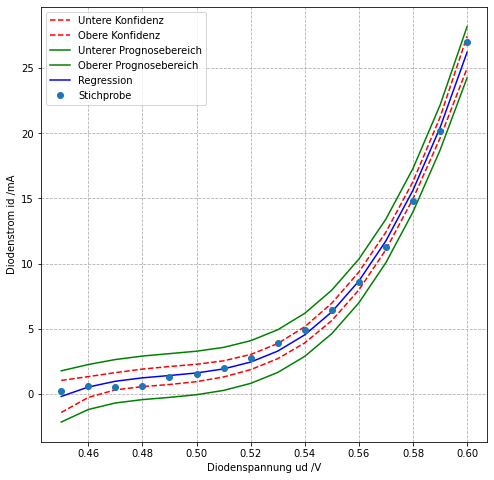

In [5]:
"""Matlab file laden"""
mat = scipy.io.whosmat('Diodenstrom.mat') #whosmat gibt eine Liste mit Variablen aus

ud = np.ravel(scipy.io.loadmat('Diodenstrom.mat')['ud'].T)
id = np.ravel(scipy.io.loadmat('Diodenstrom.mat')['id'].T)

"""Dataframe erstellen"""
df_a = pd.DataFrame(ud, columns = ['ud'])
df_a['id'] = id

"""kubisches Regressionsmodell"""
Gamma = 0.99    #Anpassen!
alpha = 1-Gamma

#Regeressionsfunktion 3.Grades
model_a = ols("id ~ I(ud) + I(ud**2)+ I(ud**3)", df_a).fit()
print(model_a.summary())
st_a, data_a, ss2_a = summary_table(model_a, alpha)

#erweitern des Datenframes um Prognosebereiche etc.
df_a['Fit'] = data_a[:,2]
df_a['Conll'] = data_a[:,4].T  #Conficence lower-limmit
df_a['Conul'] = data_a[:,5].T  #Confidence upper-limit
df_a['Predll'] = data_a[:,6].T #Prediction lower-limit
df_a['Predul'] = data_a[:,7].T #Prediction upper-limit

plt.figure(figsize=(8,8))
plt.plot(df_a['ud'],df_a['Conll'],'r--')
plt.plot(df_a['ud'],df_a['Conul'],'r--')
plt.plot(df_a['ud'],df_a['Predll'],'g')
plt.plot(df_a['ud'],df_a['Predul'],'g')
plt.plot(df_a['ud'],df_a['Fit'],'b')
plt.plot(df_a['ud'],df_a['id'], 'o')
plt.xlabel("Diodenspannung ud /V")
plt.ylabel("Diodenstrom id /mA")
plt.title("")
plt.legend(['Untere Konfidenz', 'Obere Konfidenz', 'Unterer Prognosebereich', 'Oberer Prognosebereich','Regression', 'Stichprobe'])
plt.grid(True, which= 'both', axis='both', linestyle='--')

04: Plotten von Residuen

C:\Users\Chris\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':


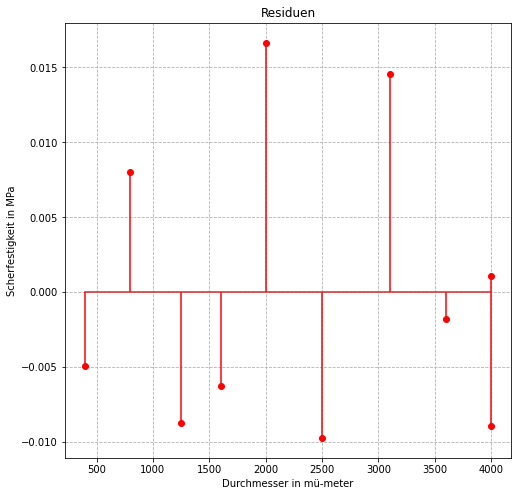

In [7]:
"""Matlab file laden"""
mat = scipy.io.whosmat('ScherfestigkeitSchweissen.mat') #whosmat gibt eine Liste mit Variablen aus

"""Vorgegebene Werte aus Aufgabe"""
data = scipy.io.loadmat('ScherfestigkeitSchweissen.mat')['data']

"""Dataframe erstellen"""
df = pd.DataFrame(data, columns=['Scherfestigkeit', 'Durchmesser'])

"""Residuen plotten (model.resid)"""
plt.figure(figsize=(8,8))
plt.stem(df['Durchmesser'], model.resid, 'r', use_line_collection=True, markerfmt='ro')
plt.grid(True, which= 'both', axis='both', linestyle='--')
plt.xlabel('Durchmesser in mü-meter')
plt.ylabel('Scherfestigkeit in MPa')
plt.title('Residuen');  
